<h1><center>Final Data Science Project.</center></h1>

<h3><center>USIT5609 MScIT Part II</center></h3>
<h2><center><b>Uber Price Prediction</b></center></h2>



Team Members:
1) Dhanashree Vartak
1) Neil Mascarenhas

#### Date: 30 June 2021

# Importing Libraries

### Basics and required.

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

### Required for modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet

####

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




## For model selection and cross validation.
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics

### Ussed for encoding and feature engineering. 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

In [20]:
# figure size in inches for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

import warnings
warnings.filterwarnings("ignore")  #### Hides warning messages to get cleaner outputs.
sns.set_theme(style = 'whitegrid')


# Import Datasets

In [21]:
uber_data=pd.read_csv('Data\cab_rides.csv')
weather_data=pd.read_csv('Data\weather.csv')

In [22]:
uber_data.head() #### To  check if the dataset is imported or not.

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [23]:
weather_data.head() #### To  check if the dataset is imported or not.

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Transformation of Data

In [24]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [25]:
uber_data.shape

(693071, 10)

In [26]:
uber_data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [27]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [28]:
weather_data.shape

(6276, 8)

In [29]:
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [30]:
## Removing rows for missing price 

uber_data.dropna(subset=['price'], inplace=True)

uber_data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

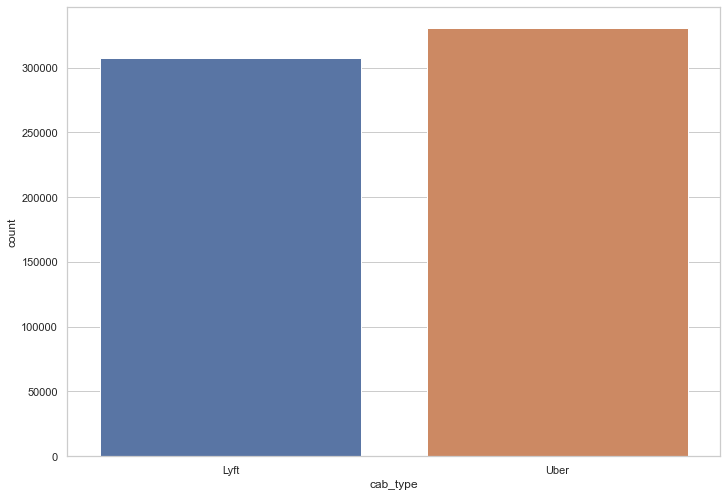

In [31]:
#new_data.cab_type.plot.bar()

ax = sns.countplot(data=uber_data, x='cab_type')

In [32]:
### Our analysis and prediction is on Uber Cars only therefore we select only uber and drop rest. 

uber_data = uber_data.loc[uber_data['cab_type'] == 'Uber']



In [33]:
# We drop rain collumn as there was no rain entire year. therefore it has missing values. We remove it as to avoid errors in prediction. 

weather_data = weather_data.drop('rain', 1)

In [34]:
### Convering timeStamp to Date time format for better analysis and modeling.

from datetime import datetime, date
uber_data['datetime']=pd.to_datetime(uber_data['time_stamp'],unit='ms', infer_datetime_format=True)
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'],unit='s',infer_datetime_format=True)

In [35]:
uber_data['Udate'] = uber_data.datetime.dt.date

In [36]:
weather_data['Wdate'] = weather_data.date_time.dt.date

In [37]:
uber_data.describe()

,distance,time_stamp,price,surge_multiplier
count,330568.000000,3.305680e+05,330568.000000,330568.0
mean,2.191386,1.544046e+12,15.795343,1.0
std,1.178973,6.897122e+08,8.560300,0.0
min,0.020000,1.543204e+12,4.500000,1.0
25%,1.300000,1.543444e+12,9.000000,1.0
50%,2.170000,1.543737e+12,12.500000,1.0
75%,2.840000,1.544828e+12,21.500000,1.0
max,7.860000,1.545161e+12,89.500000,1.0


In [38]:
weather_data.describe()

,temp,clouds,pressure,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,1.545159e+09,0.990000,18.180000


In [39]:
weather_data.loc[0:50,]

,temp,location,clouds,pressure,time_stamp,humidity,wind,date_time,Wdate
0,42.42,Back Bay,1.00,1012.14,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.43,Beacon Hill,1.00,1012.15,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16
2,42.50,Boston University,1.00,1012.15,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16
3,42.11,Fenway,1.00,1012.13,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16
4,43.13,Financial District,1.00,1012.14,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16
5,42.34,Haymarket Square,1.00,1012.15,1545003901,0.77,11.49,2018-12-16 23:45:01,2018-12-16
6,42.36,North End,1.00,1012.15,1545003901,0.77,11.46,2018-12-16 23:45:01,2018-12-16
7,42.21,North Station,1.00,1012.16,1545003901,0.77,11.37,2018-12-16 23:45:01,2018-12-16
8,42.07,Northeastern University,1.00,1012.12,1545003901,0.78,11.28,2018-12-16 23:45:01,2018-12-16
9,43.05,South Station,1.00,1012.12,1545003901,0.75,11.58,2018-12-16 23:45:01,2018-12-16


### Merging two Datasets

In [ ]:
uber_data_Temp = uber_data.sample(n = 25000, random_state = 12345) ### As the data is too much we work on only 5000 records

## Concatinating two datasets into one for modeling.

UberWeather = pd.merge(uber_data_Temp, weather_data, how='inner', left_on=['Udate','destination'], right_on=['Wdate','location'])


In [ ]:
#UberWeather = pd.merge(uber_data, weather_data, how='left', left_on='Udate', right_on=Wdate)

UberWeather.shape

In [ ]:
UberWeather.head()

In [ ]:
UberWeather.isnull().sum()

## Feature Engineering

In [ ]:
UberWeather['Wweek']=UberWeather.date_time.dt.day_of_week
UberWeather['Whour']=UberWeather.date_time.dt.hour

In [ ]:
UberWeather.info()

In [ ]:
UberWeather.surge_multiplier = pd.to_numeric(UberWeather.surge_multiplier)
#to_numeric(a)

In [ ]:
sns.heatmap(UberWeather.isnull())

In [ ]:
UberWeather.fillna(0,inplace=True)

In [ ]:

ax = sns.countplot(data=UberWeather, x='surge_multiplier')

In [ ]:
UberWeather.columns

In [ ]:
UberWeather.groupby('cab_type').count()

## Explotary Data Analysis with final dataset.

In [ ]:
#new_data.cab_type.plot.bar()

ax = sns.countplot(data=UberWeather, x='cab_type')


In [ ]:
ax = sns.countplot(data=UberWeather, y='destination', order = UberWeather.destination.value_counts().index)

In [ ]:

ax = sns.countplot(data=UberWeather, y='source', order = UberWeather.source.value_counts().index)

In [ ]:
#UberWeather['price'].value_counts().plot(kind='hist',color='Blue')


fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.price, color='green',label='Price', kde=True)
plt.legend();


In [ ]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.distance, color='red',label='Distance', kde=True)
plt.legend();




In [ ]:

fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.temp, color='blue',label='Temperature', kde=True)
plt.legend();



In [ ]:

fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.clouds, color='Skyblue',label='Clouds', kde=True)
plt.legend();



In [ ]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.pressure, color='orange',label='Air Pressure', kde=True)
plt.legend();



In [ ]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.humidity, color='purple',label='Humidity', kde=True)
plt.legend();





In [ ]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.wind, color='maroon',label='Wind', kde=True)
plt.legend();



In [ ]:

#UberWeather['hour'].value_counts().plot(kind='hist',color='orange')

sns.displot(UberWeather.Whour, color='red',label='Hours', kde=True)
plt.legend();


In [ ]:
s = sns.displot(UberWeather.Wweek, color='maroon',label='Weeks', kde=True) 
s.set_xticklabels(['','Sun','Mon','Tus','Wed','Thu','Fri','Sat',''])

plt.legend();



In [ ]:
sns.scatterplot(data=UberWeather, x="Whour", y="price")

In [ ]:
sns.scatterplot(data=UberWeather, x="Wweek", y="price")



In [ ]:
sns.scatterplot(data=UberWeather, x="distance", y="price")



In [ ]:
sns.scatterplot(data=UberWeather, x="temp", y="price")



In [ ]:
sns.scatterplot(data=UberWeather, x="clouds", y="price")



In [ ]:
sns.scatterplot(data=UberWeather, x="pressure", y="price")



In [ ]:
sns.scatterplot(data=UberWeather, x="humidity", y="price")



In [ ]:

sns.scatterplot(data=UberWeather, x="wind", y="price")


In [ ]:
desc = UberWeather.describe().T
df1 = pd.DataFrame(index=['distance', 'price',
                          'temp', 'clouds', 'pressure', 'humidity', 'wind', 
                           'Wweek', 'Whour'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

## Feature Engineering

In [ ]:
UberWeather.columns 

In [ ]:
### Here we remove unwanted collumns for modeling. We remove columsn which have all values repeited and columns which have all distinct values.


UberMod = UberWeather.drop(['cab_type','time_stamp_x','id','product_id','datetime','Udate','time_stamp_y','date_time'], axis=1)

In [ ]:
UberMod

In [ ]:
## Here we encode data by remapping it to numeric values so its easier for the model to process and be more efficient.

le = LabelEncoder()
UberMod.destination = le.fit_transform(UberMod.destination)

UberMod.source = le.fit_transform(UberMod.source)

UberMod.name = le.fit_transform(UberMod.name)

UberMod.location = le.fit_transform(UberMod.location)

UberMod.Wdate = le.fit_transform(UberMod.Wdate)

UberMod.price = le.fit_transform(UberMod.price)

In [ ]:
UberMod